In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression as LR

from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
import scipy
from imblearn.over_sampling import SMOTE

In [2]:
credit=pd.read_csv('/Users/fireyr/Documents/ml/cs-training.csv')
pd.set_option('display.max_columns', 20) # 设置显示最大列数
pd.set_option('display.max_rows', 20000) # 设置显示最大行数

In [3]:
#EDA
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [4]:
credit.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [5]:
credit['MonthlyIncome'].value_counts()

5000.0       2757
4000.0       2106
6000.0       1934
3000.0       1758
0.0          1634
2500.0       1551
10000.0      1466
3500.0       1360
4500.0       1226
7000.0       1223
8000.0       1127
2000.0       1116
7500.0       1051
10500.0      1013
5500.0        897
6500.0        841
9000.0        763
1.0           605
3200.0        584
6250.0        570
4200.0        569
4166.0        554
1500.0        553
12000.0       547
8333.0        543
8500.0        505
3750.0        504
3600.0        503
2400.0        501
12500.0       499
2800.0        493
5833.0        483
3333.0        474
3800.0        460
2600.0        454
4800.0        452
11000.0       450
5200.0        443
6666.0        436
2200.0        434
15000.0       425
3400.0        422
1600.0        387
1800.0        376
5416.0        375
5800.0        371
1000.0        367
4300.0        364
3300.0        364
1200.0        364
4600.0        361
4100.0        353
9500.0        348
4400.0        340
4583.0        339
2700.0    

In [6]:
credit['NumberOfDependents'].value_counts()

0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64

In [7]:
credit.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [8]:
credit.drop(credit[credit['age']<18].index,inplace=True)
credit.drop(credit[credit['age']>70].index,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f92ac53a130>,
 'caps': [<matplotlib.lines.Line2D at 0x7f92ac53a7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f92ac49bd90>,
 'medians': [<matplotlib.lines.Line2D at 0x7f92ac53aeb0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f92ac530250>,
 'means': []}

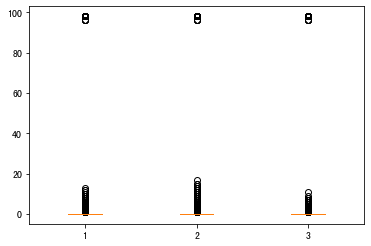

In [9]:
overdue=credit.iloc[:,[3,7,9]]
plt.boxplot(overdue)

In [10]:
credit.drop(credit[credit['NumberOfTime30-59DaysPastDueNotWorse']>80].index,inplace=True)
credit.drop(credit[credit['NumberOfTimes90DaysLate']>80].index,inplace=True)
credit.drop(credit[credit['NumberOfTime60-89DaysPastDueNotWorse']>80].index,inplace=True)

In [11]:
credit.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [12]:
credit.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,132096.000000,132096.000000,132096.000000,132096.000000,132096.000000,1.078830e+05,132096.000000,132096.000000,132096.000000,132096.000000,129401.000000
mean,0.071781,6.457249,48.924487,0.263823,369.126486,6.800817e+03,8.526193,0.099148,1.071569,0.070456,0.833711
std,0.258126,263.019364,12.007290,0.722151,2118.931140,1.494192e+04,5.133348,0.510049,1.139464,0.345095,1.152283
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.038041,40.000000,0.000000,0.190882,3.500000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.186276,49.000000,0.000000,0.372897,5.500000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.606029,59.000000,0.000000,0.813260,8.344000e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,50708.000000,70.000000,13.000000,329664.000000,3.008750e+06,58.000000,17.000000,54.000000,11.000000,20.000000


In [13]:
credit.shape

(132096, 11)

In [14]:
credit['MonthlyIncome'].fillna(credit['MonthlyIncome'].mean(),inplace=True)
credit['NumberOfDependents'].fillna(credit['NumberOfDependents'].mode()[0],inplace=True)

In [15]:
credit.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.0
6,0,0.305682,57,0,5710.000000,6800.816625,8,0,3,0,0.0
7,0,0.754464,39,0,0.209940,3500.000000,8,0,0,0,0.0
8,0,0.116951,27,0,46.000000,6800.816625,2,0,0,0,0.0
9,0,0.189169,57,0,0.606291,23684.000000,9,0,4,0,2.0
10,0,0.644226,30,0,0.309476,2500.000000,5,0,0,0,0.0


In [16]:
credit['SeriousDlqin2yrs'].value_counts()

0    122614
1      9482
Name: SeriousDlqin2yrs, dtype: int64

In [17]:
X=credit.iloc[:,1:]
y=credit.iloc[:,0]
sm = SMOTE(random_state=42)
X,y=sm.fit_resample(X,y)
y.value_counts()

1    122614
0    122614
Name: SeriousDlqin2yrs, dtype: int64

In [18]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)
X_train,X_test, Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [19]:
model_data = pd.concat([Y_train, X_train], axis=1)
model_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
244227,1,0.847308,48,4,0.466641,5200.000000,12,1,1,3,1.084101
145820,1,0.037093,39,0,0.280579,50000.000000,14,0,4,0,2.000000
222015,1,0.968967,40,2,0.624438,5082.396515,5,0,0,1,3.396515
132248,1,0.750626,48,3,0.275454,8240.842392,5,0,0,0,1.157608
38111,0,0.270200,61,0,0.349094,6344.000000,8,0,2,0,0.000000


In [20]:
test_data=pd.concat([X_test,Y_test],axis=1)
test_data.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
71423,0.003700,63,0,0.002330,3862.000000,5,0,0,0,0.000000,0
1109,0.082239,30,0,2065.000000,6800.816625,7,0,2,0,0.000000,0
205034,0.683493,59,3,0.820089,4348.654137,13,3,1,0,0.538345,1
219492,0.709052,31,1,0.695554,3040.579029,9,0,1,0,1.420971,1
28407,0.000207,58,0,0.090629,9400.000000,5,0,1,0,0.000000,0


In [21]:
def cul_woe(df,x,y,n=10):
    credit["qcut"], updown = pd.qcut(x,duplicates='drop',retbins=True,q=n)
    cut_pos = credit[y == 0].groupby(by="qcut").count()["SeriousDlqin2yrs"]
    cut_neg = credit[y == 1].groupby(by="qcut").count()["SeriousDlqin2yrs"]
    num_bins = [*zip(updown,updown[1:],cut_pos,cut_neg)]

    for i in range(n):
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(num_bins[0][0],num_bins[1][1],num_bins[0][2]+num_bins[1][2],num_bins[0][3]+num_bins[1][3])]
            continue
        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1] = [(num_bins[i-1][0],num_bins[i][1],num_bins[i-1][2]+num_bins[i][2],num_bins[i-1][3]+num_bins[i][3])]
                break
            else:
                break
    return num_bins

rel=cul_woe(model_data,credit['RevolvingUtilizationOfUnsecuredLines'],credit['SeriousDlqin2yrs'])
rel1=cul_woe(model_data,credit['age'],credit['SeriousDlqin2yrs'])
rel2=cul_woe(model_data,credit["DebtRatio"],credit['SeriousDlqin2yrs'])
rel3=cul_woe(model_data,credit["NumberOfTime30-59DaysPastDueNotWorse"],credit['SeriousDlqin2yrs'])
rel4=cul_woe(model_data,credit["MonthlyIncome"],credit['SeriousDlqin2yrs'])
rel5=cul_woe(model_data,credit["NumberOfOpenCreditLinesAndLoans"],credit['SeriousDlqin2yrs'])
rel6=cul_woe(model_data,credit["NumberOfTimes90DaysLate"],credit['SeriousDlqin2yrs'])
rel7=cul_woe(model_data,credit["NumberRealEstateLoansOrLines"],credit['SeriousDlqin2yrs'])
rel8=cul_woe(model_data,credit["NumberOfTime60-89DaysPastDueNotWorse"],credit['SeriousDlqin2yrs'])
rel9=cul_woe(model_data,credit["NumberOfDependents"],credit['SeriousDlqin2yrs'])

print(rel)
print(rel1)

[(0.0, 0.00394222, 12857, 353), (0.00394222, 0.024389054, 13002, 208), (0.024389054, 0.0545972505, 12996, 213), (0.0545972505, 0.103794841, 12929, 281), (0.103794841, 0.186276159, 12840, 369), (0.186276159, 0.3128790780000001, 12689, 521), (0.3128790780000001, 0.49199674500000046, 12430, 779), (0.49199674500000046, 0.7406846029999999, 11894, 1316), (0.7406846029999999, 0.9915757709999999, 10886, 2323), (0.9915757709999999, 50708.0, 10091, 3119)]
[(21.0, 32.0, 13067, 1621), (32.0, 38.0, 12765, 1382), (38.0, 42.0, 11152, 1116), (42.0, 46.0, 12585, 1117), (46.0, 49.0, 10453, 900), (49.0, 53.0, 13537, 1085), (53.0, 57.0, 13086, 843), (57.0, 61.0, 12845, 648), (61.0, 65.0, 12453, 480), (65.0, 70.0, 10671, 290)]


In [22]:
def woe(rel):
    columns=['min','max','count0','count1']
    df=pd.DataFrame(rel,columns=columns)
    df['total']=df.count0+df.count1
    df['percentage']=df.total/df.total.sum()
    df['badrate']=df.count1/df.count1.sum()
    df['goodrate']=df.count0/df.count0.sum()
    df['woe'] = np.log(df['goodrate'] / df['badrate'])#评价违约概率的指标，证据权重（weight of Evidence）
    return df

In [23]:
def iv(df):
    rate = df["goodrate"] - df["badrate"]
    iv = np.sum(rate * df.woe)
    return iv

In [24]:
rel_0=rel.copy()
rel_1=rel1.copy()
rel_2=rel2.copy()
rel_3=rel3.copy()
rel_4=rel4.copy()
rel_5=rel5.copy()
rel_6=rel6.copy()
rel_7=rel7.copy()
rel_8=rel8.copy()
rel_9=rel9.copy()

In [25]:
def get_bin(numbin,n,graph=True):
    bin_df=[]
    IV = []
    axisx = []
    while len(numbin)>n:
        pvs=[]
        for i in range(len(rel)-1):
            x1 = rel[i][2:]
       #     X2=num_bins_[i+1][2:]
            x2=rel[i+1][2:]
            pv=scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)

        i=pvs.index(max(pvs))#P值最大两箱合并
        numbin[i:i+2]=[(
            numbin[i][0],
            numbin[i+1][1],
            numbin[i][2]+numbin[i+1][2],
            numbin[i][3]+numbin[i+1][3])]
        bin_df=woe(numbin)
        axisx.append(len(numbin))
        IV.append(iv(bin_df))
    if graph:
        plt.figure()
        plt.plot(axisx,IV) 
        plt.xticks(axisx)
        plt.xlabel("number of box")
        plt.ylabel("IV")
        plt.show()
    return bin_df

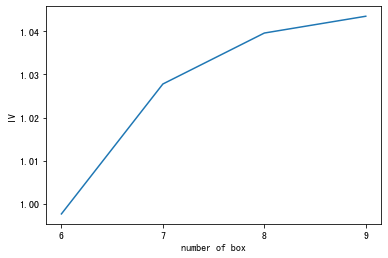

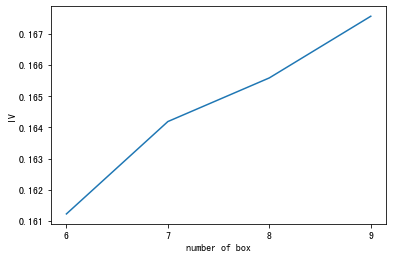

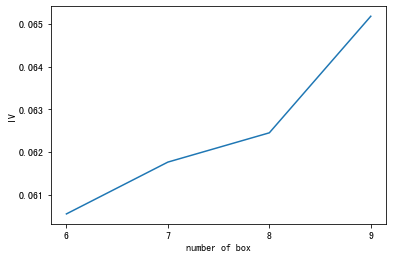

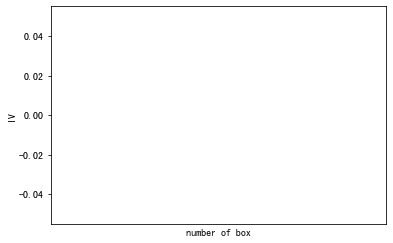

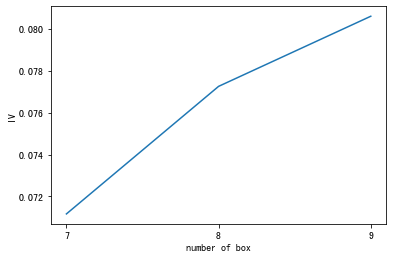

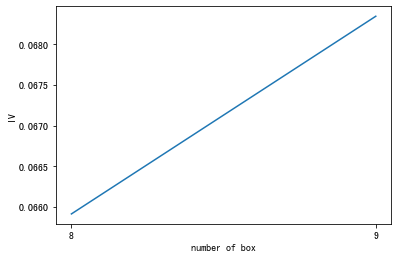

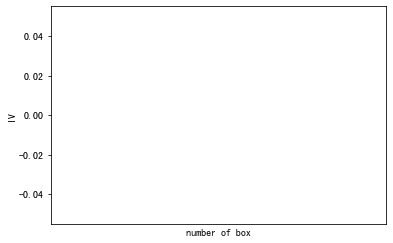

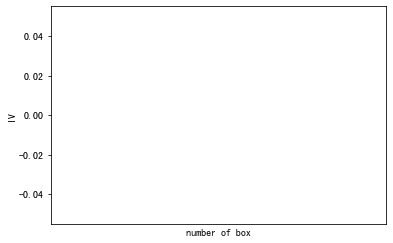

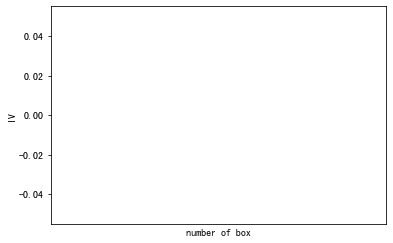

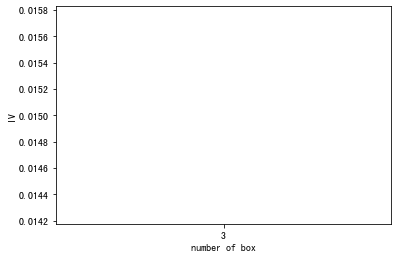

In [26]:
result0=get_bin(rel_0,6)#RevolvingUtilizationOfUnsecuredLines
result1=get_bin(rel_1,6)#age
result2=get_bin(rel_2,6)#DebtRatio
result3=get_bin(rel_3,3)#NumberOfTime30-59DaysPastDueNotWorse
result4=get_bin(rel_4,7)#MonthlyIncome
result5=get_bin(rel_5,8)#NumberOfOpenCreditLinesAndLoans
result6=get_bin(rel_6,3)#NumberOfTimes90DaysLate
result7=get_bin(rel_7,3)#NumberRealEstateLoansOrLines
result8=get_bin(rel_8,3)#NumberOfTime60-89DaysPastDueNotWorse
result9=get_bin(rel_9,3)#NumberOfDependents

In [27]:
model_data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,171659.000000,171659.000000,171659.000000,171659.000000,171659.000000,1.716590e+05,171659.000000,171659.000000,171659.000000,171659.000000,171659.000000
mean,0.499653,6.243352,46.713292,0.429235,334.585708,6.382779e+03,7.957829,0.234057,0.902487,0.121887,0.886647
std,0.500001,233.269515,11.635740,0.874765,1780.538644,1.190690e+04,5.049684,0.728792,1.129940,0.429398,1.098384
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.120274,38.000000,0.000000,0.212602,3.555000e+03,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.495864,47.000000,0.000000,0.401168,6.000000e+03,7.000000,0.000000,1.000000,0.000000,0.429782
75%,1.000000,0.889421,56.000000,1.000000,0.807927,7.000000e+03,11.000000,0.000000,1.000000,0.000000,1.640293
max,1.000000,50708.000000,70.000000,13.000000,329664.000000,3.008750e+06,57.000000,17.000000,32.000000,8.000000,20.000000


In [28]:
auto_bins={
    'RevolvingUtilizationOfUnsecuredLines':6,
    'age':6,
    'DebtRatio':6,
    'MonthlyIncome':7,
    'NumberOfOpenCreditLinesAndLoans':8
}
handle_bin={
    'NumberOfTime30-59DaysPastDueNotWorse':[0,1,2,3,13],
    'NumberOfTimes90DaysLate':[0,1,2,3,17],
    'NumberRealEstateLoansOrLines':[0,1,2,3,4,32],
    'NumberOfTime60-89DaysPastDueNotWorse':[0,1,2,8],
    'NumberOfDependents':[0,1,2,3,20]
}
handle_bin = {k:[-np.inf,*v[1:-1],np.inf] for k,v in handle_bin.items()}

In [29]:
auto_bins

{'RevolvingUtilizationOfUnsecuredLines': 6,
 'age': 6,
 'DebtRatio': 6,
 'MonthlyIncome': 7,
 'NumberOfOpenCreditLinesAndLoans': 8}

In [30]:
handle_bin

{'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 1, 2, 3, inf],
 'NumberOfTimes90DaysLate': [-inf, 1, 2, 3, inf],
 'NumberRealEstateLoansOrLines': [-inf, 1, 2, 3, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 1, 2, inf],
 'NumberOfDependents': [-inf, 1, 2, 3, inf]}

In [31]:
# print(result0)
# print(result1)
# print(result2)
# print(result4)
# print(result5)

# print(result3)
# print(result6)
# print(result7)
# print(result8)
# print(result9)

col_bin = {}
bins_list = sorted(set(result0["min"]).union(result0["max"]))
bins_list[0],bins_list[-1] = -np.inf,np.inf
col_bin['RevolvingUtilizationOfUnsecuredLines'] = bins_list

bins_list = sorted(set(result1["min"]).union(result1["max"]))
bins_list[0],bins_list[-1] = -np.inf,np.inf
col_bin['age'] = bins_list

bins_list = sorted(set(result2["min"]).union(result2["max"]))
bins_list[0],bins_list[-1] = -np.inf,np.inf
col_bin['DebtRatio'] = bins_list

bins_list = sorted(set(result4["min"]).union(result4["max"]))
bins_list[0],bins_list[-1] = -np.inf,np.inf
col_bin['MonthlyIncome'] = bins_list

bins_list = sorted(set(result5["min"]).union(result5["max"]))
bins_list[0],bins_list[-1] = -np.inf,np.inf
col_bin['NumberOfOpenCreditLinesAndLoans'] = bins_list



In [32]:
col_bin

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.00394222,
  0.3128790780000001,
  0.49199674500000046,
  0.7406846029999999,
  0.9915757709999999,
  inf],
 'age': [-inf, 32.0, 53.0, 57.0, 61.0, 65.0, inf],
 'DebtRatio': [-inf,
  0.057326008000000005,
  0.46915584400000027,
  0.635228322,
  1.729255169,
  1357.5,
  inf],
 'MonthlyIncome': [-inf,
  2375.0,
  6600.0,
  6800.816625418277,
  6833.0,
  8450.0,
  11000.0,
  inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf,
  3.0,
  7.0,
  8.0,
  9.0,
  10.0,
  12.0,
  15.0,
  inf]}

In [33]:
col_bin.update(handle_bin)

In [34]:
print(col_bin)

{'RevolvingUtilizationOfUnsecuredLines': [-inf, 0.00394222, 0.3128790780000001, 0.49199674500000046, 0.7406846029999999, 0.9915757709999999, inf], 'age': [-inf, 32.0, 53.0, 57.0, 61.0, 65.0, inf], 'DebtRatio': [-inf, 0.057326008000000005, 0.46915584400000027, 0.635228322, 1.729255169, 1357.5, inf], 'MonthlyIncome': [-inf, 2375.0, 6600.0, 6800.816625418277, 6833.0, 8450.0, 11000.0, inf], 'NumberOfOpenCreditLinesAndLoans': [-inf, 3.0, 7.0, 8.0, 9.0, 10.0, 12.0, 15.0, inf], 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 1, 2, 3, inf], 'NumberOfTimes90DaysLate': [-inf, 1, 2, 3, inf], 'NumberRealEstateLoansOrLines': [-inf, 1, 2, 3, 4, inf], 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 1, 2, inf], 'NumberOfDependents': [-inf, 1, 2, 3, inf]}


In [35]:
data = model_data.copy()
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
244227,1,0.847308,48,4,0.466641,5200.000000,12,1,1,3,1.084101
145820,1,0.037093,39,0,0.280579,50000.000000,14,0,4,0,2.000000
222015,1,0.968967,40,2,0.624438,5082.396515,5,0,0,1,3.396515
132248,1,0.750626,48,3,0.275454,8240.842392,5,0,0,0,1.157608
38111,0,0.270200,61,0,0.349094,6344.000000,8,0,2,0,0.000000


In [36]:
def get_woe(df,col,y,bins):
    df = df[[col,y]].copy()
    df["cut"] = pd.cut(df[col],bins)
    bin_df = df.groupby("cut")[y].value_counts().unstack()
#     bin_df = df.groupby("cut")[y].value_counts()
#     woe = bin_df["woe"] = np.log((bin_df[0]/bin_df[0].sum())/(bin_df[1]/bin_df[1].sum()))
    woe=bin_df['woe'] = np.log((bin_df[0]/bin_df[0].sum())/(bin_df[1]/bin_df[1].sum()))
    bin_df['iv']=bin_df['woe']*((bin_df[0]/bin_df[0].sum())-(bin_df[1]/bin_df[1].sum()))
    bin_df['ivsum']=sum(bin_df['iv'])
    return woe

In [37]:
woe_all={}
for col in col_bin:
    print(col)
    woe_all[col]=get_woe(model_data,col,'SeriousDlqin2yrs',col_bin[col])

RevolvingUtilizationOfUnsecuredLines
age
DebtRatio
MonthlyIncome
NumberOfOpenCreditLinesAndLoans
NumberOfTime30-59DaysPastDueNotWorse
NumberOfTimes90DaysLate
NumberRealEstateLoansOrLines
NumberOfTime60-89DaysPastDueNotWorse
NumberOfDependents


In [38]:
woe_all

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.00394]     2.868667
 (0.00394, 0.313]    1.289110
 (0.313, 0.492]     -0.105119
 (0.492, 0.741]     -0.721984
 (0.741, 0.992]     -1.289810
 (0.992, inf]       -0.959287
 dtype: float64,
 'age': cut
 (-inf, 32.0]   -0.454771
 (32.0, 53.0]   -0.231059
 (53.0, 57.0]    0.167678
 (57.0, 61.0]    0.416989
 (61.0, 65.0]    0.978911
 (65.0, inf]     1.872817
 dtype: float64,
 'DebtRatio': cut
 (-inf, 0.0573]     0.647400
 (0.0573, 0.469]    0.028587
 (0.469, 0.635]    -0.296674
 (0.635, 1.729]    -0.458819
 (1.729, 1357.5]   -0.016620
 (1357.5, inf]      0.343636
 dtype: float64,
 'MonthlyIncome': cut
 (-inf, 2375.0]       -0.265404
 (2375.0, 6600.0]     -0.215750
 (6600.0, 6800.817]    0.148204
 (6800.817, 6833.0]    0.011434
 (6833.0, 8450.0]      0.279392
 (8450.0, 11000.0]     0.381049
 (11000.0, inf]        0.495140
 dtype: float64,
 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 3.0]    -0.560742
 (3.0, 7.0]      0.016607
 (7.0, 8.

In [39]:
columns=col_bin.copy()
# columns_1=['RevolvingUtilizationOfUnsecuredLines','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']
# for i in columns_1:
columns.pop('RevolvingUtilizationOfUnsecuredLines')
# columns.pop('DebtRatio')
# columns.pop('MonthlyIncome')
# columns.pop('NumberOfOpenCreditLinesAndLoans')
# columns.pop('NumberOfTime60-89DaysPastDueNotWorse')
# columns.pop('NumberOfDependents')
columns
# columns=['age','NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines']

{'age': [-inf, 32.0, 53.0, 57.0, 61.0, 65.0, inf],
 'DebtRatio': [-inf,
  0.057326008000000005,
  0.46915584400000027,
  0.635228322,
  1.729255169,
  1357.5,
  inf],
 'MonthlyIncome': [-inf,
  2375.0,
  6600.0,
  6800.816625418277,
  6833.0,
  8450.0,
  11000.0,
  inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf,
  3.0,
  7.0,
  8.0,
  9.0,
  10.0,
  12.0,
  15.0,
  inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 1, 2, 3, inf],
 'NumberOfTimes90DaysLate': [-inf, 1, 2, 3, inf],
 'NumberRealEstateLoansOrLines': [-inf, 1, 2, 3, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 1, 2, inf],
 'NumberOfDependents': [-inf, 1, 2, 3, inf]}

In [40]:
m_woe = pd.DataFrame(index=model_data.index)

In [41]:
credit=model_data.copy()

In [42]:
print(type(credit))

<class 'pandas.core.frame.DataFrame'>


In [43]:
# delcol=['RevolvingUtilizationOfUnsecuredLines','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']
# delcol=['DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']
delcol=['RevolvingUtilizationOfUnsecuredLines']
credit.drop(delcol,axis=1,inplace=True)

In [44]:
credit.columns

Index(['SeriousDlqin2yrs', 'age', 'NumberOfTime30-59DaysPastDueNotWorse',
       'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'],
      dtype='object')

In [45]:
for i in columns:
    m_woe[i]=pd.cut(credit[i],columns[i]).map(woe_all[i])
m_woe['SeriousDlqin2yrs']=model_data['SeriousDlqin2yrs']
m_woe.head()

,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
244227,-0.231059,0.028587,-0.215750,0.183117,-1.416080,0.088464,-0.173678,-1.764082,-0.439837,1
145820,-0.231059,0.028587,0.495140,0.155694,0.131972,0.088464,0.343043,0.028463,-0.439837,1
222015,-0.231059,-0.296674,-0.215750,0.016607,-1.322811,0.088464,-0.173678,0.028463,-0.302466,1
132248,-0.231059,0.028587,0.279392,0.016607,-1.503957,0.088464,-0.173678,0.028463,-0.439837,1
38111,0.416989,0.028587,-0.215750,0.190916,0.131972,0.088464,0.684451,0.028463,0.186126,0


In [46]:
credit_test=test_data.copy()
# delcol=['RevolvingUtilizationOfUnsecuredLines','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']
# delcol=['DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']
delcol=['RevolvingUtilizationOfUnsecuredLines']

credit_test.drop(delcol,axis=1,inplace=True)
credit_test

,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
71423,63,0,0.002330,3862.000000,5,0,0,0,0.000000,0
1109,30,0,2065.000000,6800.816625,7,0,2,0,0.000000,0
205034,59,3,0.820089,4348.654137,13,3,1,0,0.538345,1
219492,31,1,0.695554,3040.579029,9,0,1,0,1.420971,1
28407,58,0,0.090629,9400.000000,5,0,1,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
201320,22,1,0.606302,271.895275,3,1,0,0,0.000000,1
103957,38,0,0.488678,5166.000000,9,0,2,0,2.000000,0
68980,43,0,3349.000000,6800.816625,16,0,1,0,3.000000,0
124957,61,0,3507.000000,6800.816625,12,0,3,0,0.000000,0


In [47]:
test_woe = pd.DataFrame(index=credit_test.index)
for i in columns:
    test_woe[i]=pd.cut(credit_test[i],columns[i]).map(woe_all[i])
test_woe['SeriousDlqin2yrs']=credit_test['SeriousDlqin2yrs']

In [48]:
X = m_woe.iloc[:,:-1]
y = m_woe.iloc[:,-1]

# X_col=list(X.columns)
# # y_col=list(y.columns)
# credit_valiX=credit_test.loc[:,X_col]
# credit_valiY=credit_test.iloc[:,-1]

vali_X = test_woe.iloc[:,:-1]
vali_y = test_woe.iloc[:,-1]

In [49]:
lr = LR().fit(X,y)
lr.score(vali_X,vali_y)

0.6782476314752137

In [50]:
c_1 = np.linspace(0.01,1,20)
c_2 = np.linspace(0.01,0.1,20)

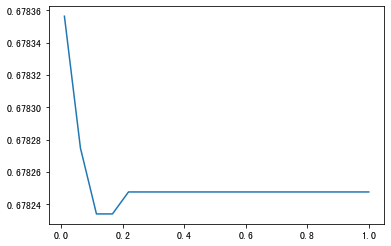

In [51]:
score = []
for i in c_1: 
    lr = LR(solver='liblinear',C=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot(c_1,score)
plt.show()

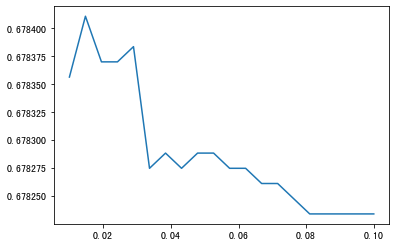

In [52]:
score = []
for i in c_2: 
    lr = LR(solver='liblinear',C=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot(c_2,score)
plt.show()

In [53]:
lr.n_iter_

array([5], dtype=int32)

/Users/fireyr/Downloads/anaconda3/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fireyr/Downloads/anaconda3/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fireyr/Downloads/anaconda3/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fireyr/Downloads/anaconda3/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fireyr/Downloads/anaconda3/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.w

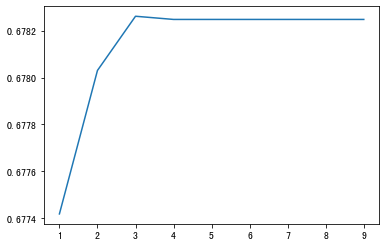

In [54]:
score = []
for i in [1,2,3,4,5,6,7,8,9]: 
    lr = LR(solver='liblinear',C=0.25,max_iter=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot([1,2,3,4,5,6,7,8,9],score)
plt.show()

In [58]:
lr = LR(solver='liblinear',C=0.25).fit(X,y)
y_pred_prob =lr.predict_proba(vali_X)
 
#计算ROC曲线，既真阳率、假阳率等
fpr,tpr,thresholds = roc_curve(vali_y,y_pred_prob[:,1])
 
#计算AUC值
auc1=metrics.auc(fpr,tpr)
print(auc1)

0.7481622012157453


In [59]:
B=20/np.log(2)
A=600 + B*np.log(1/60) 
A,B

(481.8621880878296, 28.85390081777927)

In [60]:
lr.intercept_

array([-0.00129046])

In [61]:
base_score = A - B*lr.intercept_
base_score

array([481.89942275])

In [63]:
woe_all

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.00394]     2.868667
 (0.00394, 0.313]    1.289110
 (0.313, 0.492]     -0.105119
 (0.492, 0.741]     -0.721984
 (0.741, 0.992]     -1.289810
 (0.992, inf]       -0.959287
 dtype: float64,
 'age': cut
 (-inf, 32.0]   -0.454771
 (32.0, 53.0]   -0.231059
 (53.0, 57.0]    0.167678
 (57.0, 61.0]    0.416989
 (61.0, 65.0]    0.978911
 (65.0, inf]     1.872817
 dtype: float64,
 'DebtRatio': cut
 (-inf, 0.0573]     0.647400
 (0.0573, 0.469]    0.028587
 (0.469, 0.635]    -0.296674
 (0.635, 1.729]    -0.458819
 (1.729, 1357.5]   -0.016620
 (1357.5, inf]      0.343636
 dtype: float64,
 'MonthlyIncome': cut
 (-inf, 2375.0]       -0.265404
 (2375.0, 6600.0]     -0.215750
 (6600.0, 6800.817]    0.148204
 (6800.817, 6833.0]    0.011434
 (6833.0, 8450.0]      0.279392
 (8450.0, 11000.0]     0.381049
 (11000.0, inf]        0.495140
 dtype: float64,
 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 3.0]    -0.560742
 (3.0, 7.0]      0.016607
 (7.0, 8.

In [65]:
score_age = woe_all["age"] * (-B*lr.coef_[0][1])
score_age

cut
(-inf, 32.0]   -17.480628
(32.0, 53.0]    -8.881513
(53.0, 57.0]     6.445265
(57.0, 61.0]    16.028346
(61.0, 65.0]    37.627645
(65.0, inf]     71.987829
dtype: float64

In [66]:
lr.coef_[0]

array([-0.78387713, -1.33216885, -0.25316023, -0.9434435 , -0.94683584,
       -0.79271661, -0.9002949 , -0.59001204, -0.72548731])

In [67]:
file = "/Users/fireyr/Documents/ml/finance_risk/score.csv"

with open(file,"w") as sdata:
    sdata.write("base_score,{}\n".format(base_score))
for i,col in enumerate(X.columns):
    score = woe_all[col] * (-B*lr.coef_[0][i])
    score.name = "Score"
    score.index.name = col
    score.to_csv(file,header=True,mode="a")